# "COVID-19 Data Analysis and Visualization"
> "코로나19 데이터 분석 및 시각화"

- toc: false
- branch: master
- badges: true
- comments: true
- categories: [Visualization, plotly]
- hide: false
- search_exclude: true
  
<br/>  

## 분석 개요 📑
- - - 

- **작성일** : 2020-09-29
- **작성자** : 채연희
- **조사 목적** : 코로나19 국내 및 해외 현황 분석, 지표 연관 분석
  
<br/>  

- **데이터 출처**
    - https://www.who.int/
    - https://countrycode.org/
    - https://www.worldometers.info/
    - https://kdx.kr/ 
    - https://github.com/jihoo-kim/Data-Science-for-COVID-19
    - http://ncov.mohw.go.kr/
  
<br/>  

- **사용 라이브러리**


In [8]:
import pandas as pd
import numpy as np
import json

# 시각화 라이브러리
import plotly.graph_objects as go
import plotly.express as ex

# 선형회귀분석 (OLS) 라이브러리
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 표준화·정규화 라이브러리
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

 
<br/>  

# 세계 코로나 현황
- - -

## 국가별 누적 확진자 지도
  
<br/>  

- 2020-09-21 기준
- 자료 출처 : https://www.who.int/
- 지도 json 출처 : https://gist.github.com/markmarkoh/2969317  
<br/> 
- plotly.graph_objects.Choroplethmapbox

In [41]:
import plotly.graph_objects as go
import json
import pandas as pd
mapdata = pd.read_csv("c:/data/mapdata.csv")
mapdata_cc = mapdata[['Country_code', 'Cumulative_cases']]

with open("c:/data/countries.geo.json", "r") as cg_json:
    countries = json.load(cg_json)
countries

trace = go.Choroplethmapbox(geojson=countries,
                            locations=mapdata_cc.Country_code,
                            z=mapdata_cc.Cumulative_cases,
                            colorscale="Blues",
                            zmin=0,
                            zmax=1000000,
                            marker_opacity=0.8,
                            marker_line_width=0.5,
                            colorbar=dict(thickness=10,
                                          ticklen=3,
                                          outlinecolor='white'))
layout = go.Layout(mapbox_style="carto-positron",
                   mapbox_zoom=1,
                   mapbox_center={"lat": 37.0902},
                  margin=dict(l=0, r=0, t=0, b=0))
figu = go.Figure(data=[trace], layout=layout)
figu.show()

  
<br/>  


## 세계 확진자 / 사망자 추세
  
<br/>  
- 2020-09-21 기준
- plotly.graph_objects.Scatter
  
<br/>  
- New_cases : 세계 신규 확진자
- New_deaths : 코로나 바이러스로 인한 세계 신규 사망자

In [11]:
import pandas as pd
import plotly.graph_objects as go

covid_world = pd.read_csv("c:/data/covid_world.csv")
layout = go.Layout(template="seaborn")
fig = go.Figure(layout= layout)
fig.add_trace(go.Scatter(x = covid_world['Date_reported'], y = covid_world['New_cases'],
                        name = 'New_cases'))
fig.add_trace(go.Scatter(x = covid_world['Date_reported'], y = covid_world['New_deaths'], 
                        name = 'New_deaths', fill='tozeroy'))
fig.update_layout(legend_title = None, xaxis_title=None, yaxis_title=None,
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)
fig.show()

  
<br/>  

## 누적 확진자 TOP10 국가의 확진자 발생 추세 📈
  
<br/>  

- 2020-09-21 기준 누적확진자 TOP10
- 자료 출처 : https://www.who.int/
- plotly.express.line

In [12]:
import pandas as pd
import plotly.express as px
covid_10_pivot = pd.read_csv("c:/data/covid_10_pivot.csv")
covid_10_pivot.set_index('Date_reported', inplace = True)
fig = px.line(covid_10_pivot, color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_layout(legend_title = None, xaxis_title=None, yaxis_title=None,
                 template="plotly_white", margin=dict(l=0, r=0, t=0, b=0))
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)
fig.show()

## 누적 사망자 TOP10 국가의 확진자 발생 추세 📈
  
<br/>  

- 2020-09-21 기준 누적사망자 TOP10
- 자료 출처 : https://www.who.int/
- plotly.express.line

In [13]:
import pandas as pd
import plotly.express as px
covid_10_death_pivot = pd.read_csv("c:/data/covid_10_death_pivot.csv")
covid_10_death_pivot.set_index('Date_reported', inplace = True)
fig = px.line(covid_10_death_pivot, color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_layout(legend_title = None, xaxis_title=None, yaxis_title=None,
                 template="plotly_white", margin=dict(l=0, r=0, t=0, b=0))
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)
fig.show()

## WTO 지역별

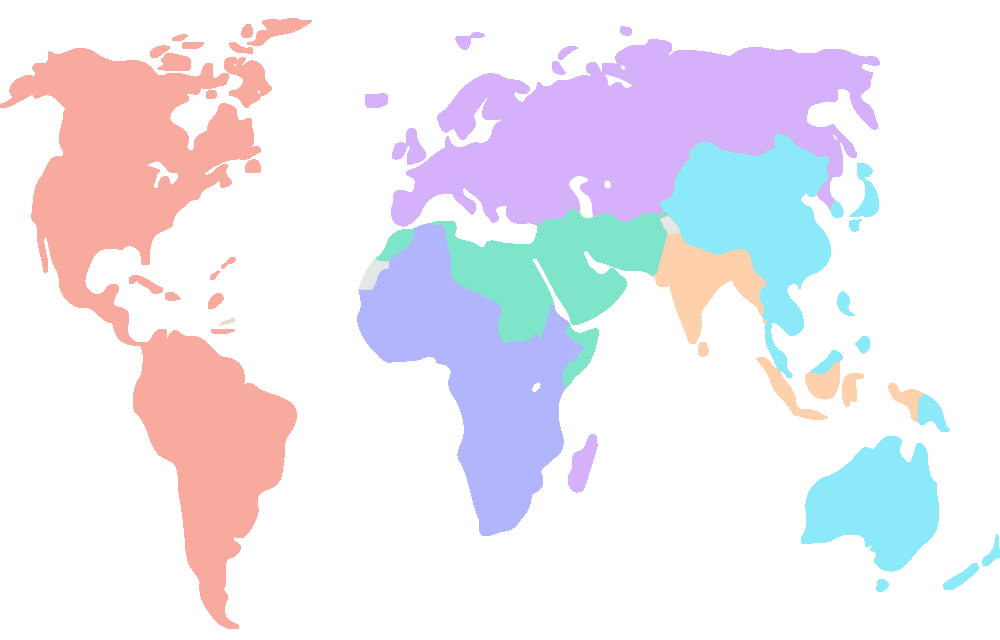

In [6]:
from PIL import Image
im = Image.open("c:/data/1.5 HBV-MAP-01.png")
im

### WHO 기준 세계 영역별 확진자 추세 📈
  
<br/>  

- 2020-09-21 기준
- 자료 출처 : https://www.who.int/, https://countrycode.org/
- plotly.express.line

In [14]:
import pandas as pd
import plotly.express as px
covid_who = pd.read_csv("c:/data/covid_who.csv")
covid_who = covid_who.set_index('Date_reported')
covid_who_pivot = covid_who.pivot(columns='WHO_region', values='New_cases')
covid_who_pivot.columns = [
    '아프리카 (AFRO)', '아메리카 (AMRO)', '동지중해 (EMRO)', '유럽 (EURO)', '동남아시아 (SEARO)',
    '서태평양 (WPRO)'
]
fig = px.line(covid_who_pivot)
fig.update_layout(legend_title = None, xaxis_title=None, yaxis_title=None,
                 template="simple_white", margin=dict(l=0, r=0, t=0, b=0))
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

### WHO 기준 세계 영역별 사망자 추세 📈
  
<br/>  

- 2020-09-21 기준
- 자료 출처 : https://www.who.int/, https://countrycode.org/
- plotly.express.line

In [15]:
import pandas as pd
import plotly.express as px
covid_who = pd.read_csv("c:/data/covid_who.csv")
covid_who = covid_who.set_index('Date_reported')
covid_who_pivot = covid_who.pivot(columns='WHO_region', values='New_deaths')
covid_who_pivot.columns = [
    '아프리카 (AFRO)', '아메리카 (AMRO)', '동지중해 (EMRO)', '유럽 (EURO)', '동남아시아 (SEARO)',
    '서태평양 (WPRO)'
]
fig = px.line(covid_who_pivot)
fig.update_layout(legend_title = None, xaxis_title=None, yaxis_title=None,
                 template="simple_white", margin=dict(l=0, r=0, t=0, b=0))
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

  
<br/>  


# 세계 코로나 지표 연관 분석

## 누적 확진자 수 선형회귀분석
  
<br/>  

- 종속변수 : 9월 21일 기준 누적확진자
- 독립변수 : 인구, 면적, GDP(단위: 100만달러), 합계출산률, 중위연령
- 최소자승법(OLS)에 의한 선형회귀분석
  
<br/>  

- 인구 수가 많을수록, 국가 면적이 넓을수록, GDP 수준이 높을수록 확진자 수가 많고
- 합계출산률과 중위연령이 낮을수록 확진자 수가 적게 나타남.

In [16]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
ols_data = pd.read_csv("c:/data/ols_data.csv")
results = smf.ols('Cumulative_cases ~ Population + AREA + GDP_MIL + Fert_Rate + Med_Age', data = ols_data)
results.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Cumulative_cases   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     37.69
Date:                Mon, 12 Oct 2020   Prob (F-statistic):           1.65e-26
Time:                        00:50:59   Log-Likelihood:                -2763.2
No. Observations:                 190   AIC:                             5538.
Df Residuals:                     184   BIC:                             5558.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.168e+06   4.36e+05      2.677      0.008    3.07e+05    2.03e+06
Population     0.0010      0.000      3.210      0.002       0.000       0.002
AREA           0.0564      0.024      2.362      0.019       0.009       0.104
GDP_MIL        0.2293      0.033      6.882      0.000       0.164       0.295
Fert_Rate  -1.612e+05   6.31e+04     -2.555      0.011   -2.86e+05   -3.67e+04
Med_Age    -2.427e+04   9116.291     -2.662      0.008   -4.23e+04   -6279.976
==============================================================================
Omnibus:                      102.880   Durbin-Watson:                   2.208
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12783.226
Skew:                           0.878   Prob(JB):                         0.00
Kurtosis:                      43.145   Cond. No.                     1.84e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

  
<br/>  

## 누적 사망자 수 선형회귀분석
  
<br/>  

- 누적 확진자와 달리 인구 수는 유의하지 않게 도출되어 독립변수에서 제외.
- 종속변수 : 누적 사망자
- 독립변수 : 면적, GDP(단위: 100만달러), 합계출산률, 중위연령


In [17]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
ols_data = pd.read_csv("c:/data/ols_data.csv")
results = smf.ols('Cumulative_deaths ~ AREA + GDP_MIL + Fert_Rate + Med_Age', data = ols_data)
results.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Cumulative_deaths   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     54.12
Date:                Mon, 12 Oct 2020   Prob (F-statistic):           3.82e-30
Time:                        00:51:05   Log-Likelihood:                -2076.6
No. Observations:                 190   AIC:                             4163.
Df Residuals:                     185   BIC:                             4179.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.204e+04   1.16e+04      2.762      0.006    9151.189    5.49e+04
AREA           0.0014      0.001      2.230      0.027       0.000       0.003
GDP_MIL        0.0087      0.001     10.462      0.000       0.007       0.010
Fert_Rate  -4395.0084   1685.238     -2.608      0.010   -7719.765   -1070.252
Med_Age     -640.4970    242.392     -2.642      0.009   -1118.705    -162.289
==============================================================================
Omnibus:                      126.280   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7109.602
Skew:                           1.688   Prob(JB):                         0.00
Kurtosis:                      32.777   Cond. No.                     2.74e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.74e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- 종속변수가 누적 사망자일 경우, 독립변수에 누적 확진자를 입력하면 매우 유의한 모형이 도출됨.
- 누적 확진자, GDP와 누적사망자는 양(+)의 관계

In [18]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
ols_data = pd.read_csv("c:/data/ols_data.csv")
results = smf.ols('Cumulative_deaths ~ Cumulative_cases + GDP_MIL', data = ols_data)
results.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Cumulative_deaths   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     853.4
Date:                Mon, 12 Oct 2020   Prob (F-statistic):          5.49e-103
Time:                        00:51:12   Log-Likelihood:                -2214.3
No. Observations:                 218   AIC:                             4435.
Df Residuals:                     215   BIC:                             4445.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          354.5050    438.604      0.808      0.420    -510.010    1219.020
Cumulative_cases     0.0226      0.001     26.907      0.000       0.021       0.024
GDP_MIL              0.0025      0.000      6.149      0.000       0.002       0.003
==============================================================================
Omnibus:                      185.278   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12333.160
Skew:                           2.639   Prob(JB):                         0.00
Kurtosis:                      39.468   Cond. No.                     1.57e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 대한민국 코로나 현황
- - -

## 대한민국 시도별 코로나 확진자
  
<br/>  

- 2020-09-29 기준
- 자료 출처 : http://ncov.mohw.go.kr/
- 지도 json 출처 : https://neurowhai.tistory.com/350  
  
<br/>  

- 해외 유입으로 인한 검역 인원 제외
- plotly.graph_objects.Choroplethmapbox

In [19]:
import plotly.graph_objects as go
import json
import pandas as pd
kr_mapdata = pd.read_csv("c:/data/kr_covid_0929.csv", encoding = "CP949")

In [20]:
kr_mapdata_covid = kr_mapdata[['지역','확진환자']]
kr_mapdata_covid = kr_mapdata_covid.iloc[:-1,:]

In [21]:
with open("c:/data/kr_json.json", "r", encoding= "utf-8") as cg_json:
    kr = json.load(cg_json)

In [22]:
trace_kr = go.Choroplethmapbox(geojson=kr,
                            locations=kr_mapdata_covid.지역,
                            featureidkey = 'properties.CTP_KOR_NM',
                            z=kr_mapdata_covid['확진환자'],
                            colorscale="Blues",
                            zmin=0,
                            marker_opacity=0.8,
                            marker_line_width=0.5,
                            colorbar=dict(thickness=10,
                                          ticklen=3,
                                          outlinecolor='white'))
layout_kr = go.Layout(
                   margin=dict(l=0, r=0, t=0, b=0),
                   mapbox_style="carto-positron",
                   mapbox_zoom=6,
                   mapbox_center={"lat": 36.2002,"lon":127.054})
figu_kr = go.Figure(data=[trace_kr], layout=layout_kr)
figu_kr.show()
figu_kr.write_html("c:/data/covid_kr.html")

  
<br/>  


## 대한민국 확진자 발생 정보
  
<br/>  

- 자료 출처 : https://www.who.int/
- plotly.express.area

In [23]:
import plotly.express as px

kr_covid = pd.read_csv("c:/data/kr_covid.csv")
del kr_covid['Unnamed: 0']
kr_covid.set_index('Date_reported', inplace = True)
fig = px.area(kr_covid[['New_cases']], color_discrete_sequence=px.colors.qualitative.Dark24)
fig.add_annotation(x = pd.to_datetime('2020-02-18'), y = 30, text = '대구 신천지예수교')
fig.add_annotation(x = pd.to_datetime('2020-08-10'), y = 30, text = '성북구 사랑제일교회')
fig.add_annotation(x = pd.to_datetime('2020-08-15'), y = 120, text = '8·15 서울 도심 집회')
fig.add_annotation(x = pd.to_datetime('2020-05-06'), y = 20, text = '이태원 클럽발 집단감염')
fig.add_annotation(x = pd.to_datetime('2020-03-09'), y = 200, text = '구로 신도림 코리아빌딩 집단감염')
fig.update_layout(legend_title = None, xaxis_title=None, yaxis_title=None,
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()
fig.write_html("c:/data/covid_kr_area.html")

  
<br/>  


## 4.2  대한민국 누적 확진자·완치자·사망자 정보
  
<br/>  

- 자료 출처 : https://github.com/jihoo-kim/Data-Science-for-COVID-19
- confirmed : 확진자
- released : 완치자
- deceased : 사망자
  
<br/>  

- plotly.express.area

In [25]:
import pandas as pd
time_covid = pd.read_csv("c:/data/Time_covid.csv")
time_covid['date'] = pd.to_datetime(time_covid['date'])
time_covid.set_index('date', inplace = True)

In [26]:
import plotly.express as px
fig = px.line(time_covid[['confirmed','released','deceased']],
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(legend_title = None, xaxis_title=None, yaxis_title=None,
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)
fig.show()
fig.write_html("c:/data/covid_kr_line.html")

  
<br/>  


# 대한민국 코로나 분석
---

## 연령대별 코로나 확진자 수

In [30]:
covid19_kr_GenAge = pd.read_csv("c:/data/Covid19GenAge.csv")
covid19_kr_GenAge.date = pd.to_datetime(covid19_kr_GenAge.date).dt.date

covid19_kr_GenAge_확진자 = covid19_kr_GenAge.pivot(columns='구분', values='확진자', index = 'date')
covid19_kr_GenAge_확진자 = covid19_kr_GenAge_확진자.reset_index()
fig = px.area(covid19_kr_GenAge_확진자, x=covid19_kr_GenAge_확진자.date, y = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79',
       '80 이상'], color_discrete_sequence=px.colors.sequential.haline_r)
fig.update_layout(legend_title = None, xaxis_title=None, yaxis_title=None,
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
fig.show()
fig.write_html("c:/data/covid_cases_count.html")

  
<br/>  


## 연령대별 코로나 확진자 비율

In [31]:
covid19_kr_GenAge_확진률 = covid19_kr_GenAge.pivot(columns='구분', values='확진률', index = 'date')
covid19_kr_GenAge_확진률 = covid19_kr_GenAge_확진률.reset_index()
fig = px.area(covid19_kr_GenAge_확진률, x=covid19_kr_GenAge_확진률.date, y = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79',
       '80 이상'], color_discrete_sequence=px.colors.sequential.haline_r)
fig.update_layout(legend_title = None, xaxis_title=None, yaxis_title=None,
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
fig.show()
fig.write_html("c:/data/covid_cases_rate.html")

  
<br/>  


## 연령대별 코로나 사망자 수

In [40]:
covid19_kr_GenAge_사망자 = covid19_kr_GenAge.pivot(columns='구분', values='사망자', index = 'date')
covid19_kr_GenAge_사망자 = covid19_kr_GenAge_사망자.reset_index()
fig = px.area(covid19_kr_GenAge_사망자, x=covid19_kr_GenAge_사망자.date, y = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79',
       '80 이상'], color_discrete_sequence=px.colors.sequential.matter)
fig.update_layout(legend_title = None, xaxis_title=None, yaxis_title=None,
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
fig.show()
fig.write_html("c:/data/covid_deaths_cases.html")

  
<br/>  


## 연령대별 코로나 사망자 비율

In [33]:
covid19_kr_GenAge_사망률 = covid19_kr_GenAge.pivot(columns='구분', values='사망률', index = 'date')
covid19_kr_GenAge_사망률 = covid19_kr_GenAge_사망률.reset_index()
fig = px.area(covid19_kr_GenAge_사망률, x=covid19_kr_GenAge_사망률.date, y = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79',
       '80 이상'], color_discrete_sequence=px.colors.sequential.matter)
fig.update_layout(legend_title = None, xaxis_title=None, yaxis_title=None,
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
fig.show()
fig.write_html("c:/data/covid_deaths_rate.html")

  
<br/>  


## 연령대별 코로나 치명률

In [34]:
covid19_kr_GenAge_치명률 = covid19_kr_GenAge.pivot(columns='구분', values='치명률', index = 'date')
covid19_kr_GenAge_치명률 = covid19_kr_GenAge_치명률.reset_index()
fig = px.area(covid19_kr_GenAge_치명률, x=covid19_kr_GenAge_치명률.date, y = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79',
       '80 이상'], color_discrete_sequence=px.colors.sequential.thermal_r)
fig.update_layout(legend_title = None, xaxis_title=None, yaxis_title=None,
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
fig.show()
fig.write_html("c:/data/covid_fatality_rate.html")

  
<br/>  


## SKT 마켓 인사이트 - 재택지수
- SKT 마켓 인사이트에서 제공하는 재택지수를 이용하여, 코로나 확진자 및 사망자의 수가 사람들의 재택지수에 얼마나 영향을 미치는지 알아보고자 함.
- 재택지수 : 거주지(홈) 인근 체류 시간을 집계해 지수화한 데이터  

In [233]:
home0

,date,나이,성별,시도,평일주간재택지수,휴일주간재택지수
0,20191230,10.0,NaN,NaN,0.753625,0.759337
1,20191230,50.0,NaN,NaN,0.507897,0.656622
2,20191230,NaN,NaN,광주광역시,0.558215,0.675878
3,20191230,NaN,NaN,부산광역시,0.557236,0.674099
4,20191230,NaN,NaN,인천광역시,0.558661,0.706969
...,...,...,...,...,...,...
1059,20200914,50.0,NaN,NaN,0.489034,0.621958
1060,20200914,NaN,NaN,대구광역시,0.572801,0.663530
1061,20200914,NaN,NaN,부산광역시,0.585187,0.686007
1062,20200914,NaN,NaN,전라남도,0.582789,0.649526


In [239]:
home0.date = pd.to_datetime(home0.date, format='%Y%m%d')

In [317]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
m = MinMaxScaler()
mx = m.fit_transform(np.array(kr_covid_home.New_cases).reshape(-1,1))
my = x.reshape(1,-1)[0].tolist()

from sklearn.preprocessing import StandardScaler
s = StandardScaler()
sx = s.fit_transform(np.array(kr_covid_home.New_cases).reshape(-1,1))
sy = sx.reshape(1,-1)[0].tolist()

### 코로나 발생에 따른 평일주간재택지수 변화
  
<br/>  

- 데이터 표준화 (StandardScaler) 적용
- plotly.graph_objects.Box, plotly.graph_objects.Scatter

In [36]:
home0 = pd.read_csv("c:/data/home0.csv")
home0.date = pd.to_datetime(home0.date, format='%Y%m%d')
import numpy as np
from sklearn.preprocessing import MinMaxScaler

m = MinMaxScaler()
mx = m.fit_transform(np.array(kr_covid_home.New_cases).reshape(-1,1))
my = mx.reshape(1,-1)[0].tolist()

from sklearn.preprocessing import StandardScaler
s = StandardScaler()
sx = s.fit_transform(np.array(kr_covid_home.New_cases).reshape(-1,1))
sy = sx.reshape(1,-1)[0].tolist()

In [38]:
data = home0[home0.시도.notnull()]["평일주간재택지수"]

data_mx = m.fit_transform(np.array(data).reshape(-1,1))
data_my = data_mx.reshape(1,-1)[0].tolist()
data_sx = s.fit_transform(np.array(data).reshape(-1,1))
data_sy = data_sx.reshape(1,-1)[0].tolist()

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Box(x=home0[home0.시도.notnull()]["date"], y=data_sy, name='평일주간재택지수'))
fig.add_trace(go.Scatter(x=kr_covid_home.dt, y=sy, name ='신규 확진자 발생', line_color='orange',
                        line_width = 4))
fig.update_layout(legend_title = None, xaxis_title=None, yaxis_title=None,
                  margin=dict(l=0, r=0, t=0, b=0), template = "seaborn")
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
fig.show()

fig.write_html("c:/data/covid_weekdays.html")

  
<br/>  


### 코로나 발생에 따른 주말주간재택지수 변화
  
<br/>  

- 데이터 표준화 (StandardScaler) 적용
- plotly.graph_objects.Box, plotly.graph_objects.Scatter

In [39]:
data = home0[home0.시도.notnull()]["휴일주간재택지수"]

data_mx = m.fit_transform(np.array(data).reshape(-1,1))
data_my = data_mx.reshape(1,-1)[0].tolist()
data_sx = s.fit_transform(np.array(data).reshape(-1,1))
data_sy = data_sx.reshape(1,-1)[0].tolist()

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Box(x=home0[home0.시도.notnull()]["date"], y=data_sy, name='휴일주간재택지수'))
fig.add_trace(go.Scatter(x=kr_covid_home.dt, y=sy, name ='신규 확진자 발생', line_color='orange',
                        line_width = 4))
fig.update_layout(legend_title = None, xaxis_title=None, yaxis_title=None,
                  margin=dict(l=0, r=0, t=0, b=0), template = "seaborn")
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
fig.show()
fig.write_html("c:/data/covid_weekends.html")